# Project: Wrangling and Analyze Data

#### by: Dayron Tula

## Table of Content

- [Introduction](#Introduction)

- [Data Gathering](#Data-Gathering)

- [Assesing Data](#Assessing-Data)

- [Cleaning Data](#Cleaning-Data)

- [Visualizing Data](#Analyzing-and-Visualizing-Data)

## Introduction

Data wrangling is the process of gathering, assesing, and cleaning the data. This is a complex and very useful method to make data ready for visualizations or better readability. In this project, I will be working with data from a Twitter account by the name of WeRateDogs which rates rates people's dogs based on comments. The first step is to import the libraries that will be used in the project, then we gather the data from the source, identify the quality and tidiness issues, clean the data, and finally visualize it. 

In [611]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
import os
import re
import requests
import tweepy

% matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [612]:
#Use pandas to read the data 

archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [613]:
#Testing for duplicated values

archive['tweet_id'].duplicated().sum()

0

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [614]:
# Use Request library to download the file

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [615]:
#Create/Save the file

with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    

In [616]:
#Import the tweet image predictions TSV file into a DataFrame

image_prediction = pd.read_csv('image_predictions.tsv', sep='\t')

image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [617]:
# Use Request library to download the file

url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)


In [618]:
#Create/Save the file

with open ('tweet-json.txt', mode ='wb') as file:
    file.write(response.content)

In [619]:
# Read txt file line by line
tw_list = []
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        p_json =json.loads(line)
        tw_list.append({'tweet_id': p_json['id'],
                        'retweet_count': p_json['retweet_count'],
                        'favorite_count': p_json['favorite_count'],
                        'followers_count': p_json['user']['followers_count']})

In [620]:
# Convert the list of dictionaries to a pandas DataFrame

twitter_data = pd.DataFrame(tw_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])
twitter_data.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Quality issues

1. Duplicate Data, remove dupilcated urls from the dataset. 

2. Ambiguous or misleading data, remove unneccesary columns (in reply status, retweeted status, etc...)

3. Timestamp should be in datatime data type. 

4. Image prediciton entries are not all dogs, some include shopping carts, roosters, etc...

5. Acquire only the highest confident prediction for dog breed, disregard others.

6. Source info in twitter archive is not presented in a clear manner.

7. Consistency of the data, dog names have first letter in lower case.

8. Table headers should be more descriptive.


### Tidiness issues

1. Archive table can be merged with image prediciton to form one since they are related to our goals. 

2. Doggo, pupper, puppo, and floffer in twitter archive data table are all stages of dogs and need to be in one column.

In [621]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [622]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [623]:
archive['tweet_id'].duplicated().sum()

0

In [624]:
archive['tweet_id'].isnull().sum()

0

In [625]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Observations

- Data is incomplete containing plenty of null values
- There are several incorrect data types, for example: in_reply_to_user_id and retweeted_status_id are among data types that shoulbe be swtiched from float to int.
- The rating numerator contains abnormal values including large numbers such as 1776,960.. etc
- Timestamp data type should be datetime

In [626]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [627]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [628]:
image_prediction['tweet_id'].duplicated().sum()

0

In [629]:
image_prediction['jpg_url'].duplicated().sum()

66

In [630]:
image_prediction['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
beagle                        18
Shetland_sheepdog             18
Eskimo_dog                    18
Maltese_dog                   18
teddy                         18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

#### Observations

- Many image predictions are not dogs even though the image contains a dog in it, for example: desktop computer, suit, bow, etc...
- There are duplicated image urls in the data 

In [631]:
twitter_data

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
5,891087950875897856,3261,20562,3200889
6,890971913173991426,2158,12041,3200889
7,890729181411237888,16716,56848,3200889
8,890609185150312448,4429,28226,3200889
9,890240255349198849,7711,32467,3200889


In [632]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null int64
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


#### Observation

- Need to be joined with archive table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [633]:
# Make copies of original data

archive_clean = archive.copy()
image_prediction_clean = image_prediction.copy()
tweeter_data_clean = twitter_data.copy()

### Quality Issues

### Issue #1: 

Duplicated urls in image_prediciton dataset

#### Define:

Remove the duplicates by using nunique() to only show unique values

In [634]:
# Drop duplicated urls

image_prediction_clean['jpg_url'] = image_prediction_clean['jpg_url'].drop_duplicates()

In [635]:
image_prediction_clean.jpg_url.value_counts()

https://pbs.twimg.com/media/CWUCGMtWEAAjXnS.jpg                                            1
https://pbs.twimg.com/media/CU8tOJZWUAAlNoF.jpg                                            1
https://pbs.twimg.com/media/CUswUBRUAAAahAo.jpg                                            1
https://pbs.twimg.com/media/C6WUNadWYAAPxHv.jpg                                            1
https://pbs.twimg.com/ext_tw_video_thumb/749316899712950272/pu/img/nvZI9mkoAxt89sul.jpg    1
https://pbs.twimg.com/media/CYpsFmIWAAAYh9C.jpg                                            1
https://pbs.twimg.com/media/C6MrOsEXQAENOds.jpg                                            1
https://pbs.twimg.com/media/CVPeX2dWwAEwyaR.jpg                                            1
https://pbs.twimg.com/media/C23ypm6VQAAO31l.jpg                                            1
https://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg                                            1
https://pbs.twimg.com/media/CY9_BOYWkAAkuzn.jpg                       

### Issue #2: 

Ambigous data can be misleading - remove unnecessary columns/rows from dataframe (archive)

#### Define: 

We want to see only original ratings in the data / Use isnull() on retweets to only show original tweets

#### Code

In [636]:
# Remove retweets
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

# Remove replies
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isnull()]

# Remove columns
arhive_clean = archive_clean.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id',
                      'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis =1, inplace =True)


#### Test

In [637]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #3: 

Change datatype for timestamp in dataframe (archive)

#### Define

Use pandas "to_datetime" to convert from dtype to datetime, but first we need to remove the extra 0 values.

#### Code

In [638]:
# Remove 0 values and convert to datetime

archive_clean['timestamp'] = archive['timestamp'].str[:-6]
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [639]:
archive_clean['timestamp'].head(5)

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

### Issue #4: 

Image prediction include non-dog image predicitons

#### Define

Make a query utilizing the boolean columns p1_dog, p2_dog, p3_dog to rule out False or non-dog images.

In [640]:
image_predicition_clean = image_prediction_clean.query('p1_dog == True and p2_dog ==True and p3_dog == True') 

#### Test

In [641]:
image_predicition_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #5: 

Use the image prediciton with the most confidence and eliminate the others

#### Define

- Remove the exra columns and only create two columns displaying the breed and confidence level
- Use a function to help pull the predicitions with the highest confidence level.

In [642]:
# Create two columns

Dog_Breed = []
Confidence_LVL = []

# Create the function

def image_pred(image_prediction_clean):
    if image_prediction_clean.p1_dog == True:
        Dog_Breed.append(image_prediction_clean.p1)
        Confidence_LVL.append(image_prediction_clean.p1_conf)
    elif image_prediction_clean.p2_dog == True:
        Dog_Breed.append(image_prediction_clean.p2)
        Confidence_LVL.append(image_prediction_clean.p2_conf)
    elif image_prediction_clean.p3_dog == True:
        Dog_Breed.append(image_prediction_clean.p3)
        Confidence_LVL.append(image_prediction_clean.p3_conf)
    else:
        Dog_Breed.append('Unknown_breed')
        Confidence_LVL.append(0)
        
# Apply the function by column        
image_prediction_clean.apply(image_pred, axis=1)

# Add the breed and confident_level column to image_prediction_clean 
image_prediction_clean['Dog_Breed'] = Dog_Breed
image_prediction_clean['Confidence_LVL'] = Confidence_LVL

# Drop columns no longer needed
image_prediction_clean = image_prediction_clean[['tweet_id','jpg_url','Dog_Breed','Confidence_LVL']]
        

#### Test

In [643]:
image_prediction_clean.head()

,tweet_id,jpg_url,Dog_Breed,Confidence_LVL
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


### Issue #6:

Source info in the archive dataset has extra characters that are not needed.

#### Define:

Remove long url from source column in archive data using replace to change it to a more appealing text

In [644]:
archive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [645]:
# Code to replace string

archive_clean.source = archive_clean.source.replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone',
                                                                     '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - Make a Scene',
                                                                     '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
                                                                     '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'})

#### Test

In [646]:
archive_clean['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #7:

Dog names in the archive table are in lower case, we need to make the first letter upper.

#### Define :

Use string capitalization to capitalize the first word for the Dog_Breed table.

In [647]:
image_prediction_clean['Dog_Breed'] = image_prediction_clean['Dog_Breed'].str.capitalize()

#### Test

In [648]:
image_prediction_clean.Dog_Breed.head(5)

0    Welsh_springer_spaniel
1                   Redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        Miniature_pinscher
Name: Dog_Breed, dtype: object

### Issue #8:

Table headers should be more descriptive

#### Define:

Change the description for some of the column headers including text, timestamp, and expanded url.

In [649]:
archive_clean.rename(columns = {'text': 'Comment', 'timestamp': 'Date_time', 'expanded_url':'Url'})

,tweet_id,Date_time,source,Comment,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Tidiness Issues

### Issue #9:

Join in tweeter_data with archive table

#### Define

- Left join columns using merge 

In [650]:
archive_clean= pd.merge(archive_clean, tweeter_data_clean, on = ['tweet_id'], how='left' )

#### Test

In [651]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 15 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
retweet_count         2097 non-null int64
favorite_count        2097 non-null int64
followers_count       2097 non-null int64
dtypes: datetime64[ns](1), int64(6), object(8)
memory usage: 262.1+ KB


### Issue#10:

Use merge to join in archive table with image predicion table to form one. 

In [652]:
# Join in image_prediction_clean with archive_clean

archive_clean= pd.merge(archive_clean, image_prediction_clean, on = ['tweet_id'], how='left' )

In [653]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 18 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
retweet_count         2097 non-null int64
favorite_count        2097 non-null int64
followers_count       2097 non-null int64
jpg_url               1971 non-null object
Dog_Breed             1971 non-null object
Confidence_LVL        1971 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(6), object(10)
memory usage: 311.3+ KB


### Issue#11:

Doggo, pupper, puppo, and floffer in twitter archive data table are all stages of dogs and need to be in one column

In [654]:
# Replace None in stage columns with empty string.

archive_clean.doggo.replace('None', '', inplace=True)  
archive_clean.pupper.replace('None', '', inplace=True)
archive_clean.floofer.replace('None', '', inplace=True)
archive_clean.puppo.replace('None', '', inplace=True)

# Combine stage columns.
archive_clean['stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

# Format entries with multiple dog stages which appeared like doggopupper.

archive_clean.loc[archive_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
archive_clean.loc[archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
archive_clean.loc[archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [655]:
archive_clean['stage'].replace("None",np.nan).value_counts()

                 1761
pupper            221
doggo              72
puppo              23
doggo,pupper        9
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: stage, dtype: int64

In [656]:
archive_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,followers_count,jpg_url,Dog_Breed,Confidence_LVL,stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,3200889,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unknown_breed,0.000000,
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,3200889,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328,25461,3200889,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964,42908,3200889,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9774,41048,3200889,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,3261,20562,3200889,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_bay_retriever,0.425595,
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,2158,12041,3200889,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,16716,56848,3200889,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,4429,28226,3200889,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,7711,32467,3200889,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,doggo


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [657]:
# Store clean dataframe to csv file

archive_clean.to_csv('twitter_archive_master.csv')

In [658]:
# Load data to a dataframe

df = pd.read_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Number of favorite breed

2. Total original tweets

3. number of retweets

In [659]:
df.Dog_Breed.value_counts(ascending=False).head(10)

Unknown_breed         305
Golden_retriever      156
Labrador_retriever    106
Pembroke               94
Chihuahua              90
Pug                    62
Toy_poodle             50
Chow                   48
Samoyed                42
Pomeranian             41
Name: Dog_Breed, dtype: int64

In [660]:
# Remove unknown breed from the dataset 

df = df.query('Dog_Breed != "Unknown_breed"')
df.head(5)

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,followers_count,jpg_url,Dog_Breed,Confidence_LVL,stage
1,1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,6514,33819,3200889,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,NaN
2,2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,4328,25461,3200889,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,NaN
3,3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,8964,42908,3200889,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,NaN
4,4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,9774,41048,3200889,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,NaN
5,5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,NaN,NaN,NaN,3261,20562,3200889,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_bay_retriever,0.425595,NaN


### Visualization

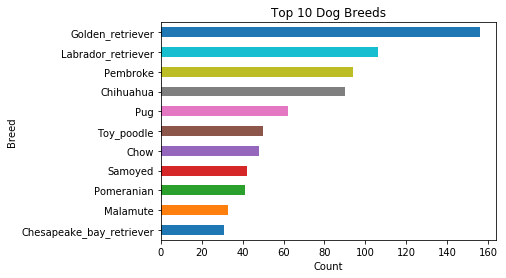

In [661]:
# PLot for the top 10 dog breeds
df.Dog_Breed.value_counts()[10::-1].plot(kind = 'barh', title = 'Top 10 Dog Breeds')
plt.xlabel('Count')
plt.ylabel('Breed');

Based on the number of tweeter posts, the most popular dog breed is Golden Retriever followed by a Labrador Retriever. 

In [663]:
# Make a list of top popular dog breeds based on number of tweets
top_count = df['Dog_Breed'].value_counts().sort_values(ascending=False).nlargest(10).rename_axis('breed').reset_index(name='tweet_counts')
breed_list = top_count.breed.tolist()

# Average rating for top breeds based on number of tweets
avg_rating = df.groupby('Dog_Breed').rating_numerator.mean().sort_values(ascending=False).rename_axis('breed').reset_index(name='avg_rating')
breed_avg_rating = avg_rating[avg_rating['breed'].isin(breed_list)]

breed_avg_rating

,breed,avg_rating
4,Chow,14.166667
5,Labrador_retriever,13.688679
9,Pomeranian,12.536585
13,Golden_retriever,12.179487
19,Samoyed,11.690476
23,Pembroke,11.425532
43,Toy_poodle,11.000000
51,Malamute,10.878788
64,Chihuahua,10.500000
79,Pug,10.241935


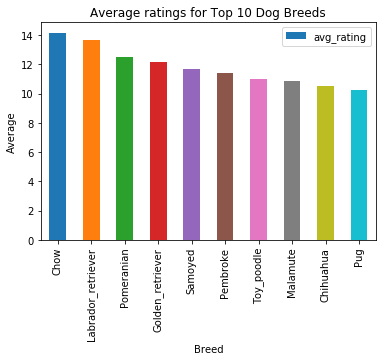

In [664]:
# Plot chart

breed_avg_rating.plot(kind='bar', x='breed', y='avg_rating')  
plt.title('Average ratings for Top 10 Dog Breeds')
plt.ylabel("Average")
plt.xlabel("Breed");

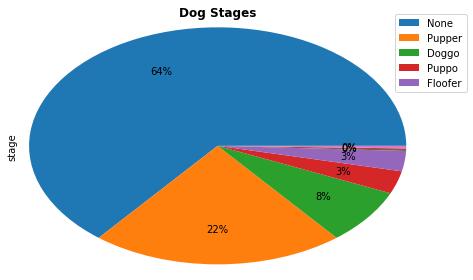

In [682]:
# Plot pie chart

df['stage'].value_counts().plot(kind='pie', startangle = 0, radius = 1.2, labels = None, autopct='%1.0f%%',pctdistance=0.7)
plt.title('Dog Stages', weight= 'bold')
plt.legend(['None', 'Pupper', 'Doggo', 'Puppo', 'Floofer'],bbox_to_anchor=(1.1,0.8), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.tight_layout()

## References

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nlargest.html
https://stackoverflow.com/questions/52436394/how-to-convert-a-pandas-value-counts-into-a-python-list/52436410
https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe